# Project 2 - Antonio Alejo and Ryan Dehass

#### Background

For this project, we are continuing with the same 2 datasets from Project 1: the first one comes from the United States EIA (Energy Information Administration), which contains a plethora of energy data, whether it relates to petroleum and fossil fuels, or renewables such as nuclear. For this project, we are strictly focused on the fossil fuels section of the dataset, interested in seeing the increase (or decrease) of fossil fuels over time, and then relating that to our second dataset: Average Celsius Temperature in the entire United States from 1901-2020, broken down by month. This second CSV file comes from the Climate Change Knowledge Portal website; there, users can find climate data for a wide range of countries, and in this case our group needed the temperature data strictly for the 50 United States.

This project is going to start off with a breakdown of yearly fossil fuel consumption, from 1949-2020 (as far as the dataset goes), as well as total yearly consumption of more specific metrics, Petroleum and Natural Gas. The next phase of the project will delve into Natural Gas and Petroleum deeper, looking at seasonal variations and trends of fossil fuel consumption, more specifically looking at 1980-2020 (the monthly data begins at 1973). Then, we will take a look at seasonal average temperatures for the country, looking at the same timeframe for consistency. The final step of this project is to compare the changes between the two, and find what kind of correlation there is. And, if there is a correlation, to measure how strong it is.

While this project looks to find a positive correlation between fossil fuel consumption in strictly the residential sector vs temperature (likely in an increasing trend), there are many more factors impacting climate change that will not be captured only from this data, such as industrial consumption, transportation, etc.

Both of these datasets will also have their links at the bottom of the report in References.

#### Imports and Data Formatting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
url1 = "MER_T02_02.csv"
df = pd.read_csv(url1)
url2 = "tas_timeseries_monthly_cru_1901-2020_USA.csv"
temp_df = pd.read_csv(url2, skiprows = 2)

In [3]:
#removal of sectors not used
df = df[df.MSN != "CLRCBUS"]
df = df[df.MSN != "TERCBUS"]
df = df[df.MSN != "LORCBUS"]
df = df[df.MSN != "TRXCBUS"]
df = df[df.MSN != "RERCBUS"]
df = df[df.MSN != "BMRCBUS"]
df = df[df.MSN != "SORCBUS"]
df = df[df.MSN != "GERCBUS"]

When downloading this dataset from the EIA site, the CSV includes all renewable energy data and other miscallaneous categories, which for the purposes of this project are not necessary; here, we remove the ones we have no intentions of using.

In [4]:
# make string version of YearMonth column to split
df['YYYYMM'] = df['YYYYMM'].astype(str)

# make the new year and month columns using string indexing
df['YYYY'] = df['YYYYMM'].str[0:4]
df['MM'] = df['YYYYMM'].str[4:6]

# get rid of the extra variable
df.drop('YYYYMM', axis=1, inplace=True)

df['Value'] = pd.to_numeric(df['Value'])
df['YYYY'] = pd.to_numeric(df['YYYY'])
df['MM'] = pd.to_numeric(df['MM'])

#dataset for monthly data
dfMonthly = df[df.MM != 13]

#dataset for yearly data
dfYearly = df.loc[df['MM'] == 13]

By default, the Energy dataset includes a YYYYMM format, which we split up into YYYY and MM. This way, we could filter out any of the beginning years (1949-1972) which only contained yearly data, and not a monthly breakdown. For this CSV, there was also a 13th month value for every year which we excluded, as it was a sum value for all the 12 months of the year, which we do not want; leaving this value in would skew our data in every graph. 

For organization, we kept all of the monthly values in a dataframe called dfMonthly; and only the yearly values being included in dfYearly.

In [5]:
df

,MSN,Value,Column_Order,Description,Unit,YYYY,MM
659,NNRCBUS,1027.283,2,Natural Gas Consumed by the Residential Sector...,Trillion Btu,1949,13
660,NNRCBUS,1240.312,2,Natural Gas Consumed by the Residential Sector...,Trillion Btu,1950,13
661,NNRCBUS,1526.340,2,Natural Gas Consumed by the Residential Sector...,Trillion Btu,1951,13
662,NNRCBUS,1678.735,2,Natural Gas Consumed by the Residential Sector...,Trillion Btu,1952,13
663,NNRCBUS,1744.496,2,Natural Gas Consumed by the Residential Sector...,Trillion Btu,1953,13
...,...,...,...,...,...,...,...
6585,ESRCBUS,529.915,10,Electricity Retail Sales to the Residential Se...,Trillion Btu,2021,7
6586,ESRCBUS,541.259,10,Electricity Retail Sales to the Residential Se...,Trillion Btu,2021,8
6587,ESRCBUS,449.865,10,Electricity Retail Sales to the Residential Se...,Trillion Btu,2021,9
6588,ESRCBUS,355.849,10,Electricity Retail Sales to the Residential Se...,Trillion Btu,2021,10


In [6]:
temp_df.columns.values[0] = "Year"



In [7]:
def x_tick():
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)


This function was created to help limit the frequency of axis ticks in the bar charts; this gets called for each of the bar charts to help prevent illegible axes.

Text(0.5, 1.0, 'Yearly Fossil Fuel Consumption from 1949 to 2020')

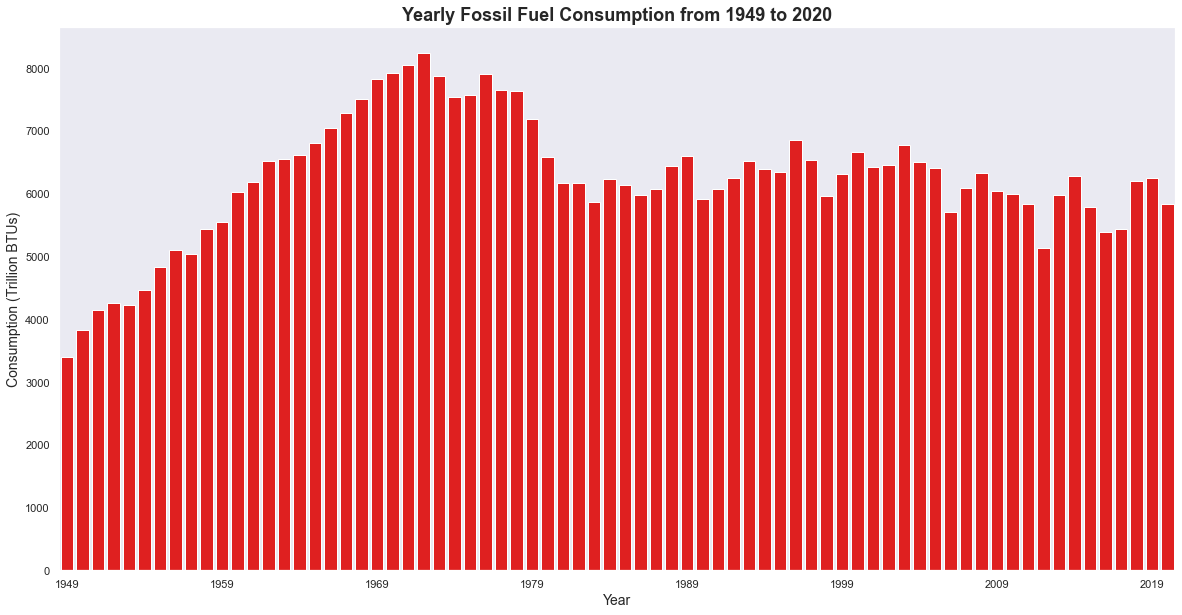

In [39]:
##Yearly Fossil Fuel Consumption: 1949-2020
dfFossilFuel = dfYearly.loc[dfYearly['MSN'] == 'FFRCBUS']

#dfFossilFuel.dtypes
ax = sns.barplot(x = 'YYYY', y = 'Value', data = dfFossilFuel, color = "red")
sns.set(rc = {'figure.figsize':(20,10)})
x_tick()
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Yearly Fossil Fuel Consumption from 1949 to 2020', fontsize = 18, fontweight = 'bold')


Our first plot looks at overall fossil fuel consumption in the residential sector in the whole US, between 1949-2020. As can be seen from the graph, consumption quickly doubles in ~12 years, and the absolute peak occurs in 1972, clocking at over 8000 Trillion BTUs consumed. There has been some tapering off since then, but no significant decreases have occured since ~2020. It is unsure why 2012 has a larger drop-off year over year, and has still been the lowest year to date in modern times.


Text(0.5, 1.0, 'Yearly Natural Gas Consumption from 1949 to 2020')

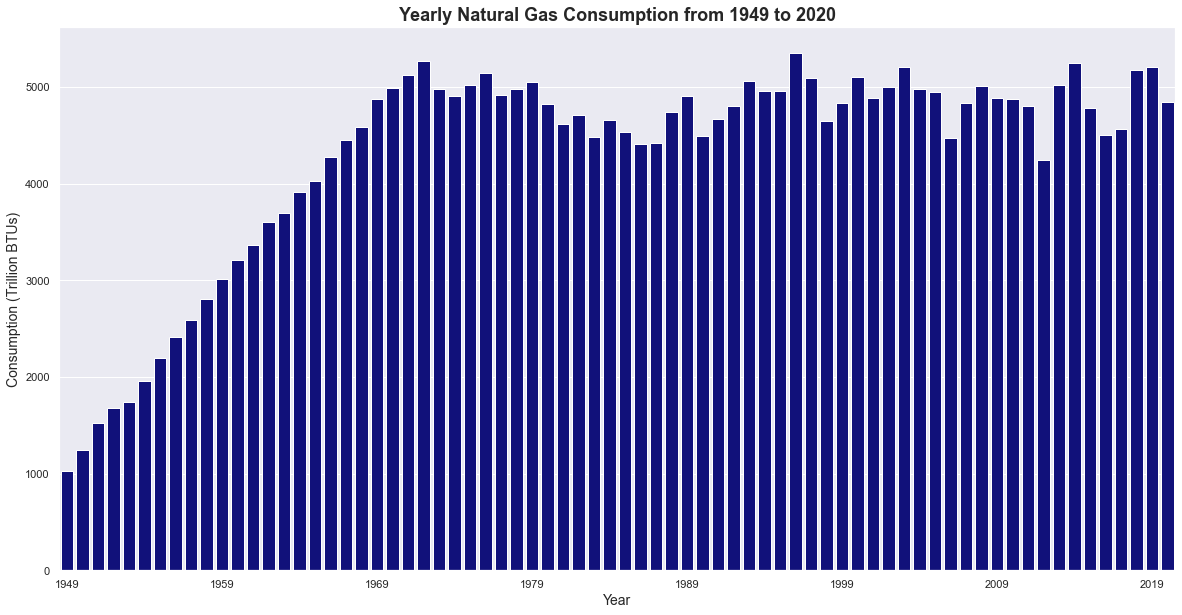

In [9]:
##Yearly Natural Gas Consumption: 1949-2020

dfNatGas = dfYearly.loc[dfYearly['MSN'] == 'NNRCBUS']

#dfFossilFuel.dtypes
ax = sns.barplot(x = 'YYYY', y = 'Value', data = dfNatGas, color = "darkblue")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("ticks")
x_tick()
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Yearly Natural Gas Consumption from 1949 to 2020', fontsize = 18, fontweight = 'bold')

Our next plot is concerned with the same year range as the previous graph, but this time breaking down strictly residential natural gas consumption. The data follows fairly similar to the overall fossil fuels, but there has been almost more increases in the last 20 years since 2000, relative to the decreases that were occuring in the late 1970s-1980s, coming down from the 1972 peak. Since fossil fuel consumption has been going down more, this means that more of the consumption occuring residentially is coming from the use of natural gas, and that the use of petroleum and coal have decreased since ~1970.

Text(0.5, 1.0, 'Yearly Petroleum Consumption from 1949 to 2020')

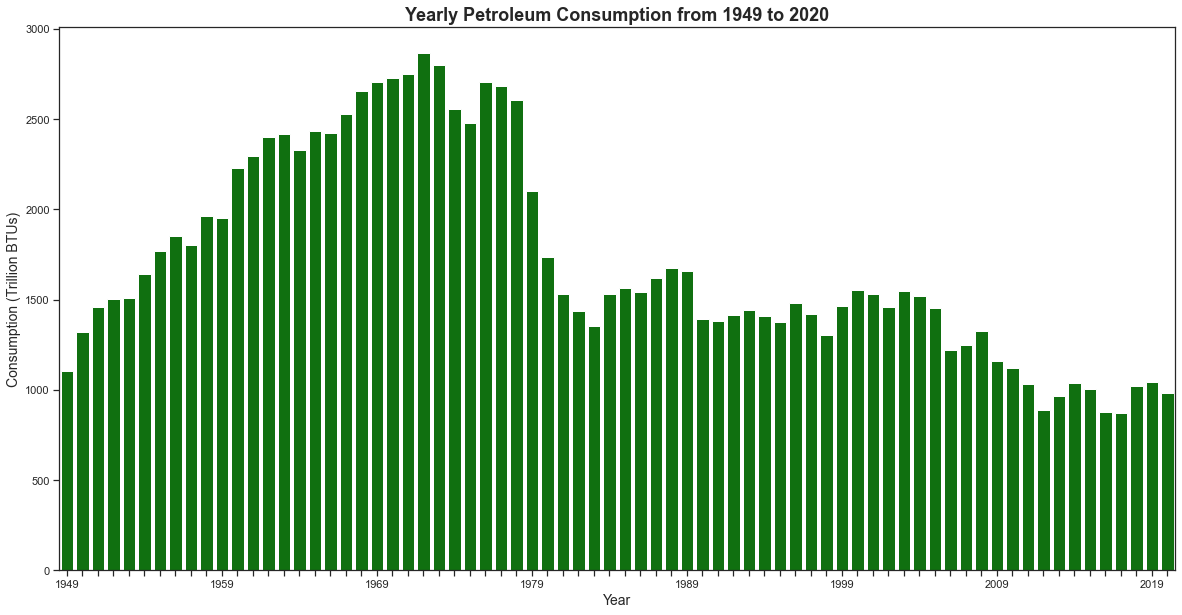

In [10]:
##Yearly Petroleum Consumption: 1949-2020

dfPetroleum = dfYearly.loc[dfYearly['MSN'] == 'PARCBUS']

#dfFossilFuel.dtypes
ax = sns.barplot(x = 'YYYY', y = 'Value', data = dfPetroleum, color = "green")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("whitegrid")
x_tick()
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Yearly Petroleum Consumption from 1949 to 2020', fontsize = 18, fontweight = 'bold')

This next graph outlines petroleum consumption over the same timeframe. As was noted in the previous graph, there has been a much more significant downturn in residential usage since ~1980, and is making up less of the overall portion of fossil fuels used. Even since 2000, there has been nearly ~33% decrease in trillion BTUs consumed. 

Text(0.5, 1.0, 'Yearly Electric Retail Sales to the Residential Sector')

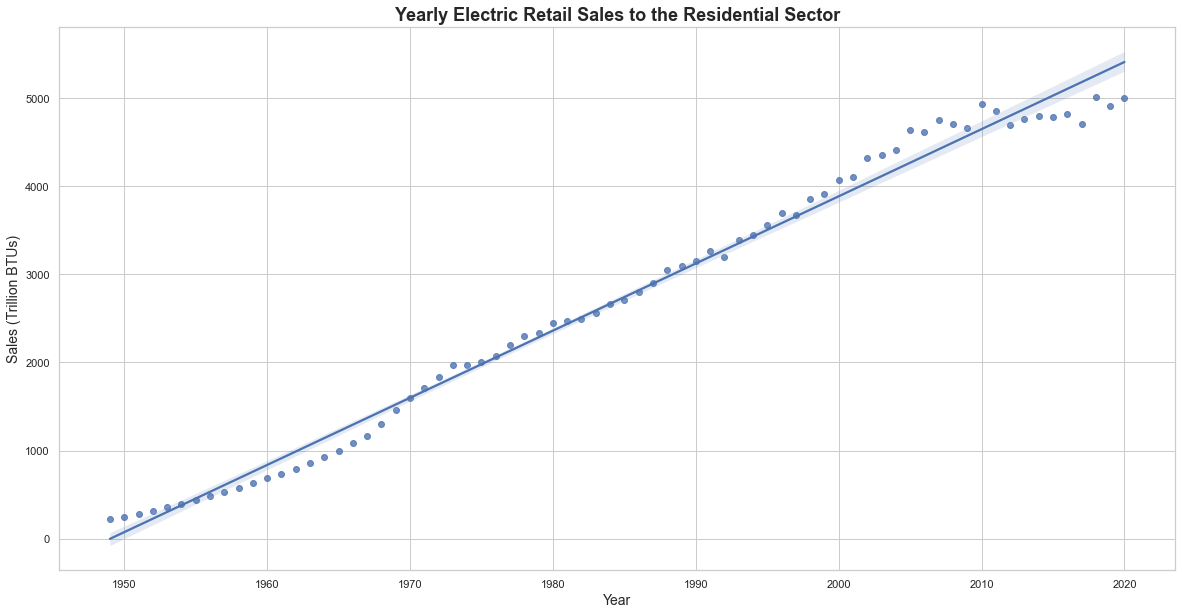

In [11]:
##Yearly Electricity Retail Sales to the Residential Sector: 1949-2020

dfElecRetail = dfYearly.loc[dfYearly['MSN'] == 'ESRCBUS']

#dfFossilFuel.dtypes
ax = sns.regplot(x = 'YYYY', y = 'Value', data = dfElecRetail)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Sales (Trillion BTUs)', fontsize = 14)
plt.title('Yearly Electric Retail Sales to the Residential Sector', fontsize = 18, fontweight = 'bold')

This graph plots electricity sales to the residential sector. This is considered electricity that is sold from the generation to the final consumer, in this case for residential areas. Here, there is a continual average upward trend since 1949, with no large outliers in the data since the beginning. However, it seems increases have slowed significantly since ~2005.


In conclusion, it appears that natural gas takes up a more significant portion of residential consumption than in the past; natural gas emits ~50-60% fewer greenhouse gases into the atmosphere compared to petroleum or coal, so this can be seen as a good thing from an emissions standpoint, but it is still not an environmentally friendly fuel source, and still contributes to climate change.

# Seasonal Consumption

This section looks into petroleum and natural gas consumption, still in the residential sector, but will now be within the 1980-2020 timeframe, plotted monthly. This way, we can get a deeper look into monthly and seasonal variations in the data. For the purposes of this project, we have the 4 seasons broken down into the following months:

-Spring: March-May

-Summer: June-August

-Fall: September-November

-Winter: December-February

Each of these seasons will be able to better show changes that would otherwise not be noticeable in the yearly graphs.

Text(0.5, 1.0, 'Spring Natural Gas Consumption from 1980 to 2020')

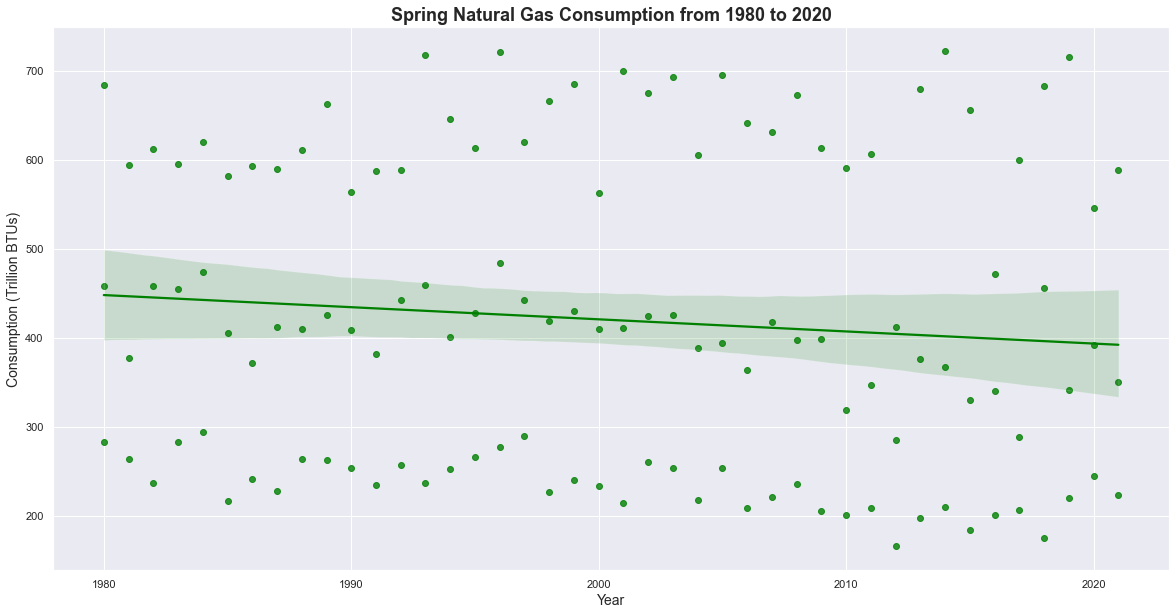

In [12]:
## Natural Gas: Spring Consumption
dfNatSpring = dfMonthly.loc[dfMonthly['MSN'] == 'NNRCBUS']
dfNatSpring = dfNatSpring.loc[dfNatSpring['YYYY'] >= 1980]
dfNatSpring = dfNatSpring.loc[dfNatSpring['MM'] >= 3]
dfNatSpring = dfNatSpring.loc[dfNatSpring['MM'] <= 5]

ax = sns.regplot(x = 'YYYY', y = 'Value', data = dfNatSpring, color = "green")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("whitegrid")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Spring Natural Gas Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

This first graph is a scatter plot with a linear regression trend line, to show the overall trend. Overall, there has been a slight decrease in natural gas consumption during the spring months, but only ~10% average decrease since 1980. It is not intuitive to tell from the graph, but March tends to have the highest natural gas consumption, and May always has the lowest. On average, the trend line fits to around the average value for April, around 400 trillion BTUs. 

Text(0.5, 1.0, 'Spring Petroleum Consumption from 1980 to 2020')

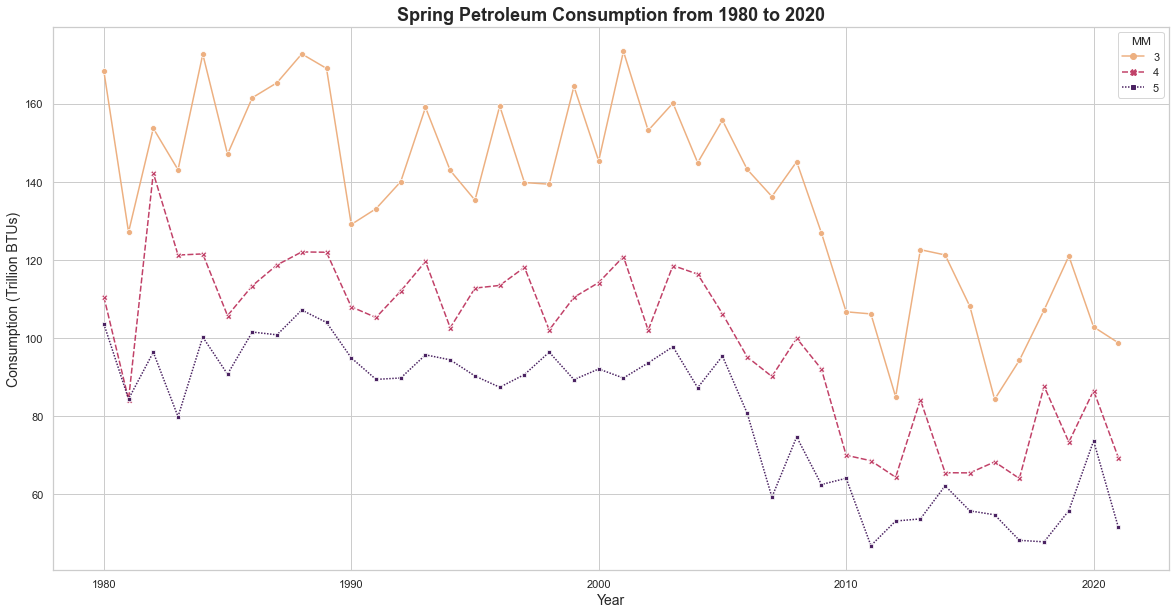

In [13]:
## Petroleum: Spring Consumption
dfPetSpring = dfMonthly.loc[dfMonthly['MSN'] == 'PARCBUS']
dfPetSpring = dfPetSpring.loc[dfPetSpring['YYYY'] >= 1980]
dfPetSpring = dfPetSpring.loc[dfPetSpring['MM'] >= 3]
dfPetSpring = dfPetSpring.loc[dfPetSpring['MM'] <= 5]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfPetSpring, hue = 'MM', style = 'MM',
                 markers = True, palette = 'flare')
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Spring Petroleum Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

On the other hand, it is clear spring petroleum usage has decreased significantly more; for example, May 2021 had ~50 trillion BTUs consumed, a far cry from the 1988 peak ~105 trillion BTUs. March has not had as strong of relative decrease compared to 1980, but has still had a strong absolute decrease. This ultimately shows that consumption in the Spring months has now had more natural gas used, relative to petroleum.

Text(0.5, 1.0, 'Spring Fossil Fuel Consumption from 1980 to 2020')

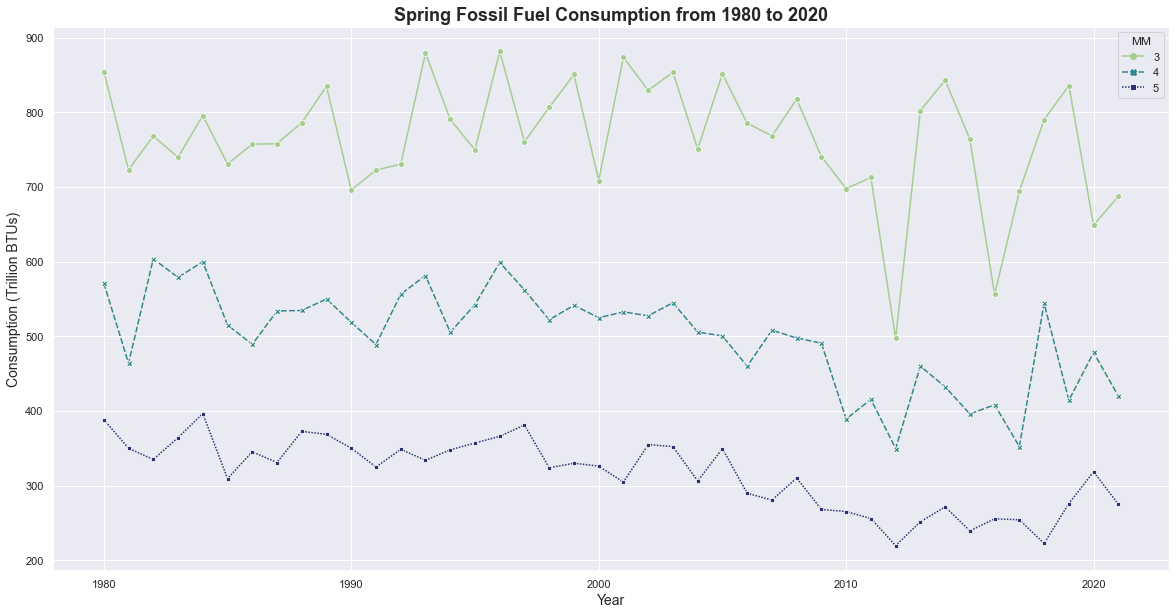

In [14]:
## Total Fossil Fuels: Spring Consumption

dfTotSpring = dfMonthly.loc[dfMonthly['MSN'] == 'FFRCBUS']
dfTotSpring = dfTotSpring.loc[dfTotSpring['YYYY'] >= 1980]
dfTotSpring = dfTotSpring.loc[dfTotSpring['MM'] >= 3]
dfTotSpring = dfTotSpring.loc[dfTotSpring['MM'] <= 5]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfTotSpring, hue = 'MM', style = 'MM',
                 markers = True, palette = 'crest')
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Spring Fossil Fuel Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Fossil fuel consumption in the spring has not decreased as significantly petroleum consumption, but it has seen a decrease. It is interesting to see that fossil fuel consumption in March 2012 dropped very significantly, from ~700 to ~500 trillion BTUs. With that being said, it is even more interesting that there was an even larger rise compared to that decrease, from ~500 to ~800 trillion BTUs in March 2013.

Text(0.5, 1.0, 'Summer Natural Gas Consumption from 1980 to 2020')

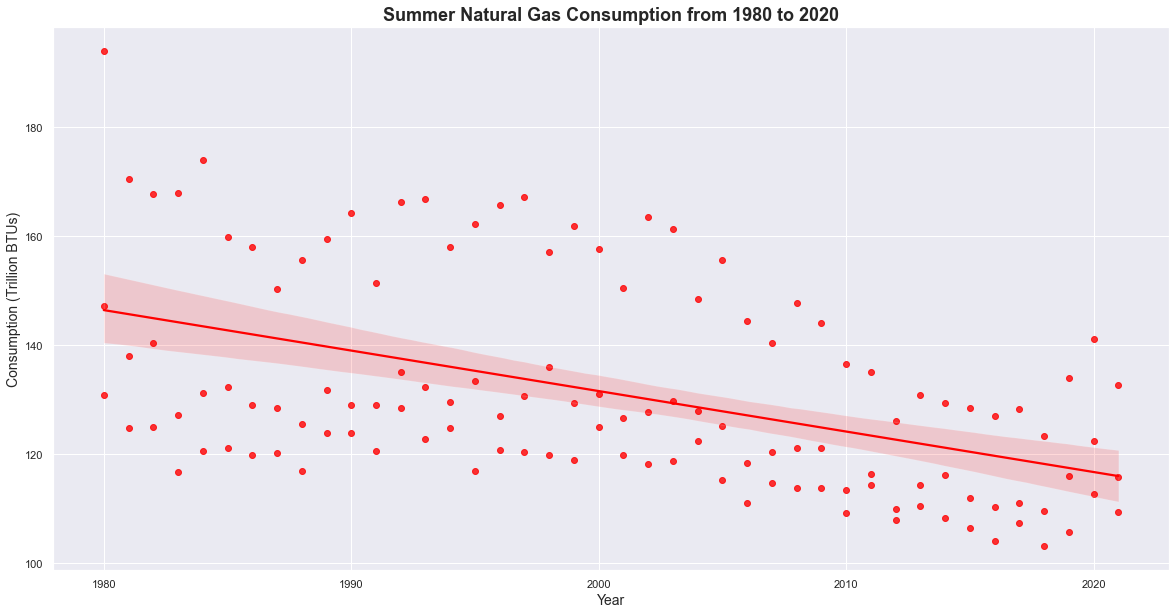

In [15]:
## Natural Gas: Summer Consumption
dfNatSummer = dfMonthly.loc[dfMonthly['MSN'] == 'NNRCBUS']
dfNatSummer = dfNatSummer.loc[dfNatSummer['YYYY'] >= 1980]
dfNatSummer = dfNatSummer.loc[dfNatSummer['MM'] >= 6]
dfNatSummer = dfNatSummer.loc[dfNatSummer['MM'] <= 8]

ax = sns.regplot(x = 'YYYY', y = 'Value', data = dfNatSummer, color = "red")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("dark")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Summer Natural Gas Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Next, we move onto Summer consumption. For this season, natural gas has clearly had a larger decrease in comparison to Spring; the average has decreased ~20%. Interestingly, there has been slightly more variation in the data points in the last few years, whereas in the mid 2000s the confidence interval was lower, due to smaller spread in the data.

Text(0.5, 1.0, 'Summer Petroleum Consumption from 1980 to 2020')

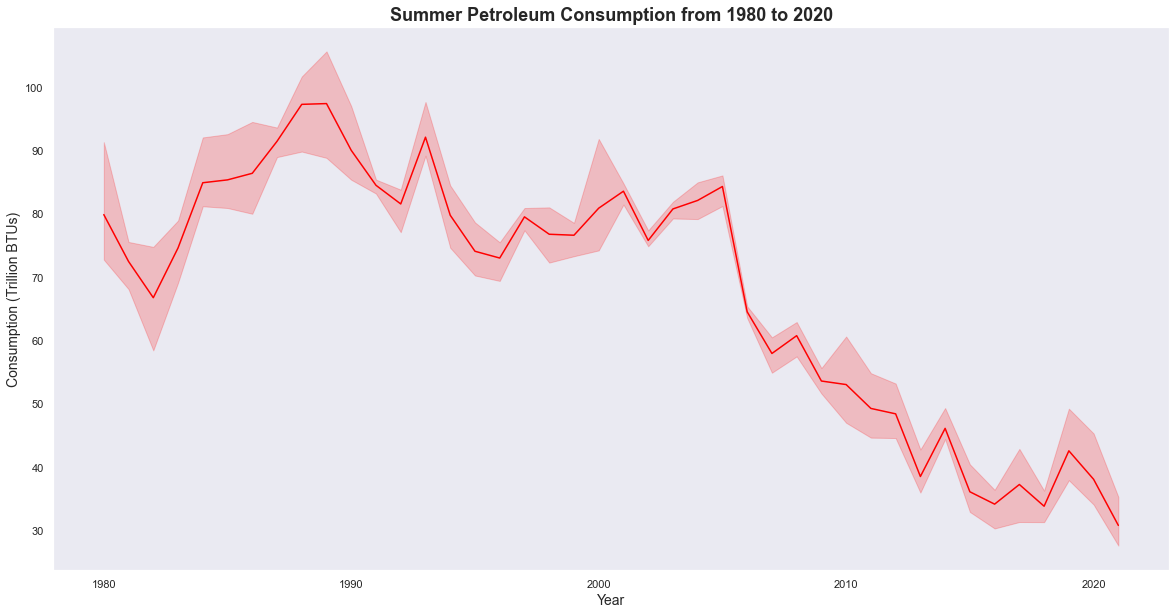

In [16]:
## Petroleum: Summer Consumption
dfPetSummer = dfMonthly.loc[dfMonthly['MSN'] == 'PARCBUS']
dfPetSummer = dfPetSummer.loc[dfPetSummer['YYYY'] >= 1980]
dfPetSummer = dfPetSummer.loc[dfPetSummer['MM'] >= 6]
dfPetSummer = dfPetSummer.loc[dfPetSummer['MM'] <= 8]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfPetSummer, color = "red")
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Summer Petroleum Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Similar to what occured with natural gas vs petroleum in the Spring, there has been an even larger decrease from the 1988 peak; 2021 was the lowest recorded usage year for petroleum during the summer months in the entire dataset. While there was an uptick in the 2010s, overall there has been a clear decresaeing trend since ~2005.

Text(0.5, 1.0, 'Summer Fossil Fuel Consumption from 1980 to 2020')

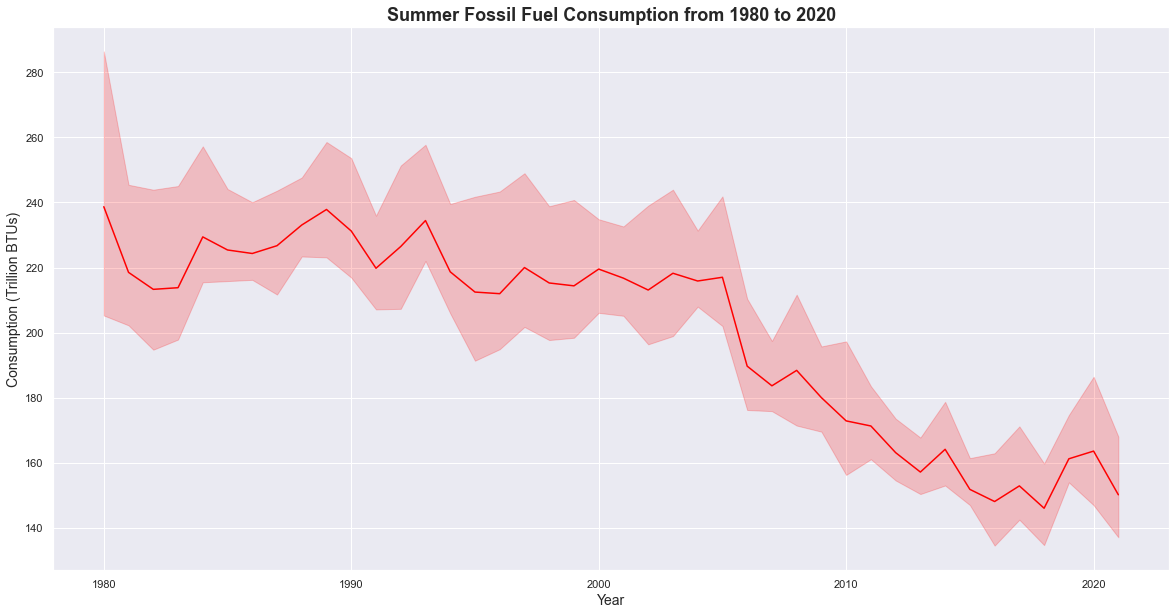

In [17]:
## Total Fossil Fuels: Summer Consumption

dfTotSummer = dfMonthly.loc[dfMonthly['MSN'] == 'FFRCBUS']
dfTotSummer = dfTotSummer.loc[dfTotSummer['YYYY'] >= 1980]
dfTotSummer = dfTotSummer.loc[dfTotSummer['MM'] >= 6]
dfTotSummer = dfTotSummer.loc[dfTotSummer['MM'] <= 8]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfTotSummer, color = "red")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("ticks")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Summer Fossil Fuel Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Fossil fuel consumption in the summer has been on the decline since 1980 and it has seen a more significant decrease since 2005, similar to the summer petroleum consumption. Starting from ~240 trillion BTUs, that value has dropped to ~150 trillion BTUs in 2021. Overall, there is less fossil fuel consumption in the summer than the months that proceed it.

Text(0.5, 1.0, 'Fall Natural Gas Consumption from 1980 to 2020')

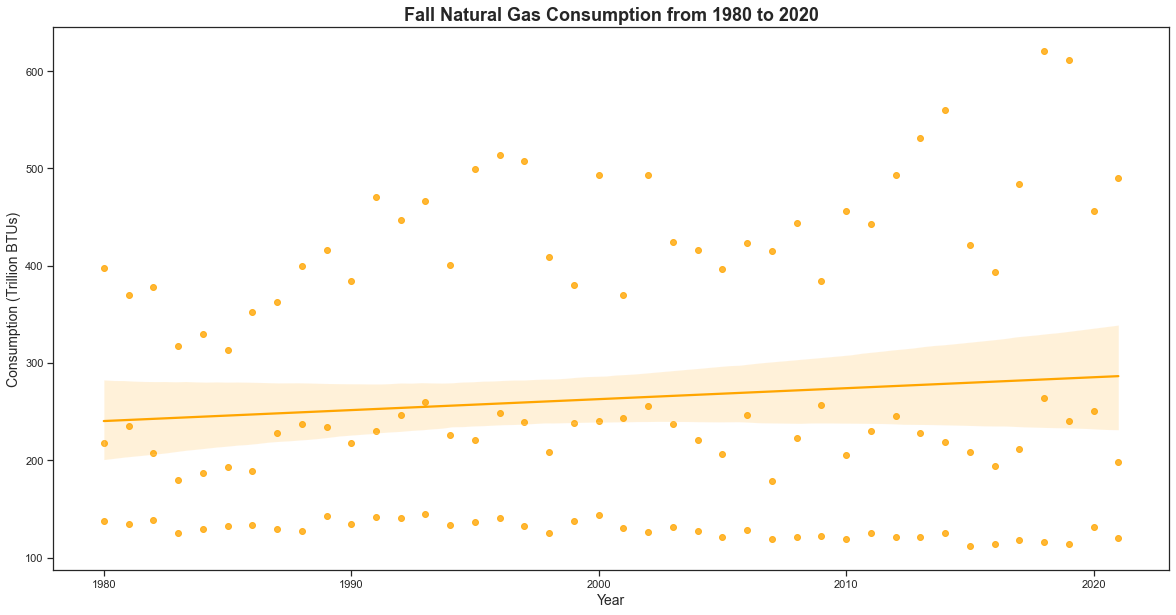

In [18]:
## Natural Gas: Fall Consumption
dfNatFall = dfMonthly.loc[dfMonthly['MSN'] == 'NNRCBUS']
dfNatFall = dfNatFall.loc[dfNatFall['YYYY'] >= 1980]
dfNatFall = dfNatFall.loc[dfNatFall['MM'] >= 9]
dfNatFall = dfNatFall.loc[dfNatFall['MM'] <= 11]

ax = sns.regplot(x = 'YYYY', y = 'Value', data = dfNatFall, color = "orange")
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Fall Natural Gas Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Natural gas in the Fall months differs from the previous two seasons; there has been a slight increase in the average residential consumption during that time. An important item to note is that natural gas tends to be used more with heating, so increases during the winter/late fall months are to be more expected as temperatures continue to cool, but particularly in recent years where there has been larger temperature variations due to climate change. 

Text(0.5, 1.0, 'Fall Petroleum Consumption from 1980 to 2020')

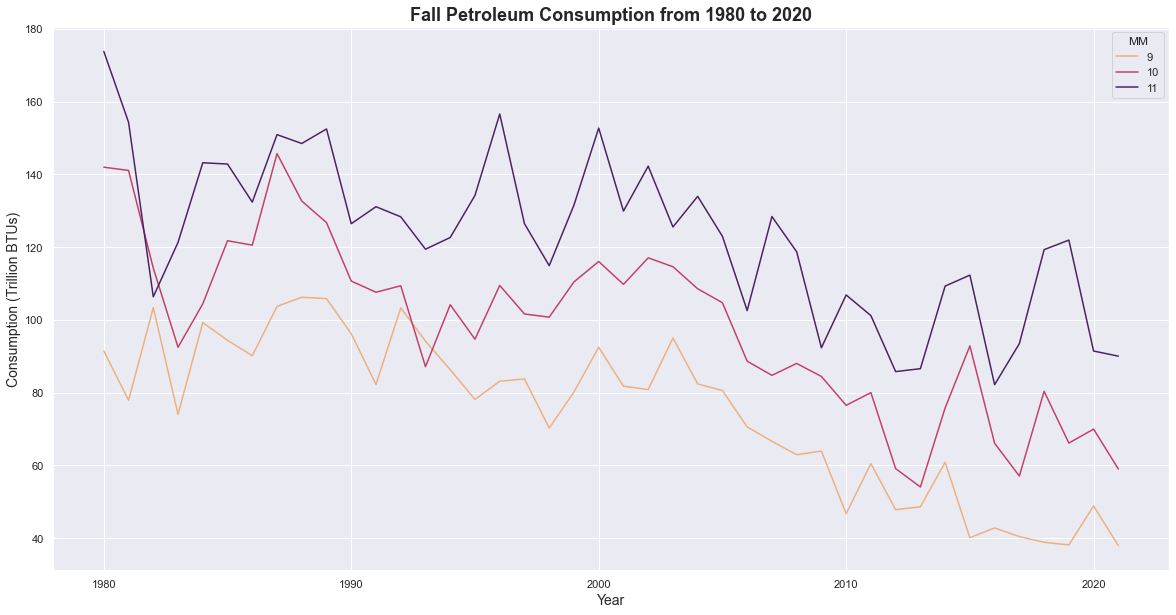

In [19]:
## Petroleum: Fall Consumption
dfPetFall = dfMonthly.loc[dfMonthly['MSN'] == 'PARCBUS']
dfPetFall = dfPetFall.loc[dfPetFall['YYYY'] >= 1980]
dfPetFall = dfPetFall.loc[dfPetFall['MM'] >= 9]
dfPetFall = dfPetFall.loc[dfPetFall['MM'] <= 11]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfPetFall, hue = "MM",
                 palette = 'flare')
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Fall Petroleum Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Following the previous two seasons, petroleum has continued to decreased, although the changes have been more erratic. Since 2000, there has been an overall downward trend, but from year to year there is more variation in how each month changes. For example, November in the late '10s had a signifciant uptick from ~2015, while September and October did not see the same spike; in fact, September has largely stayed flat for the last 5 years.

Text(0.5, 1.0, 'Fall Fossil Fuel Consumption from 1980 to 2020')

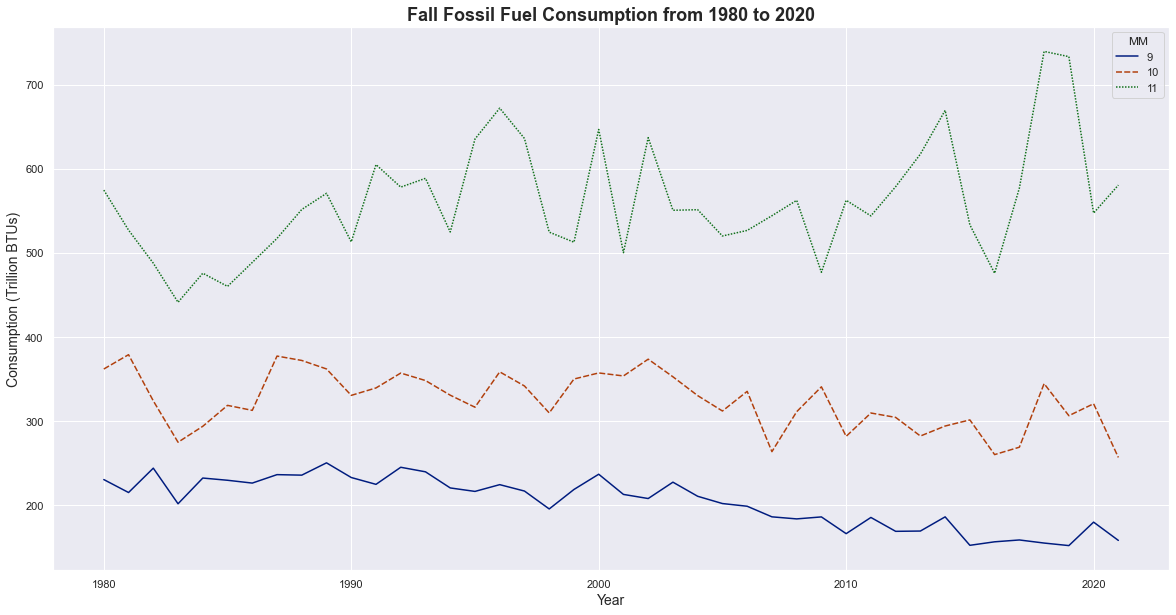

In [20]:
## Total Fossil Fuels: Fall Consumption

dfTotFall = dfMonthly.loc[dfMonthly['MSN'] == 'FFRCBUS']
dfTotFall = dfTotFall.loc[dfTotFall['YYYY'] >= 1980]
dfTotFall = dfTotFall.loc[dfTotFall['MM'] >= 9]
dfTotFall = dfTotFall.loc[dfTotFall['MM'] <= 11]

ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfTotFall, hue = 'MM', style = 'MM', palette = 'dark')
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("whitegrid")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Fall Fossil Fuel Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Fall fossil fuel was interesting to look at. Sepetmber and October have seen a slight decrease in fossil fuel consumption overall, and consumption in those months is a lot less than that of November. If we were to add September and October fossil fuel consumption, it would be about the same or slightly less than November fossil fuel consumption. November's fossil fuel consumption has fluctuated, its minimum being ~450 trillion BTUs around 1983 and its peak at ~740 trillion BTUs in 2018. Overall, however, fossil fuel consumption in 2021 has ended up at the same point that the data starts at in 1980, which is ~575 trillion BTUs.

Text(0.5, 1.0, 'Winter Natural Gas Consumption from 1980 to 2020')

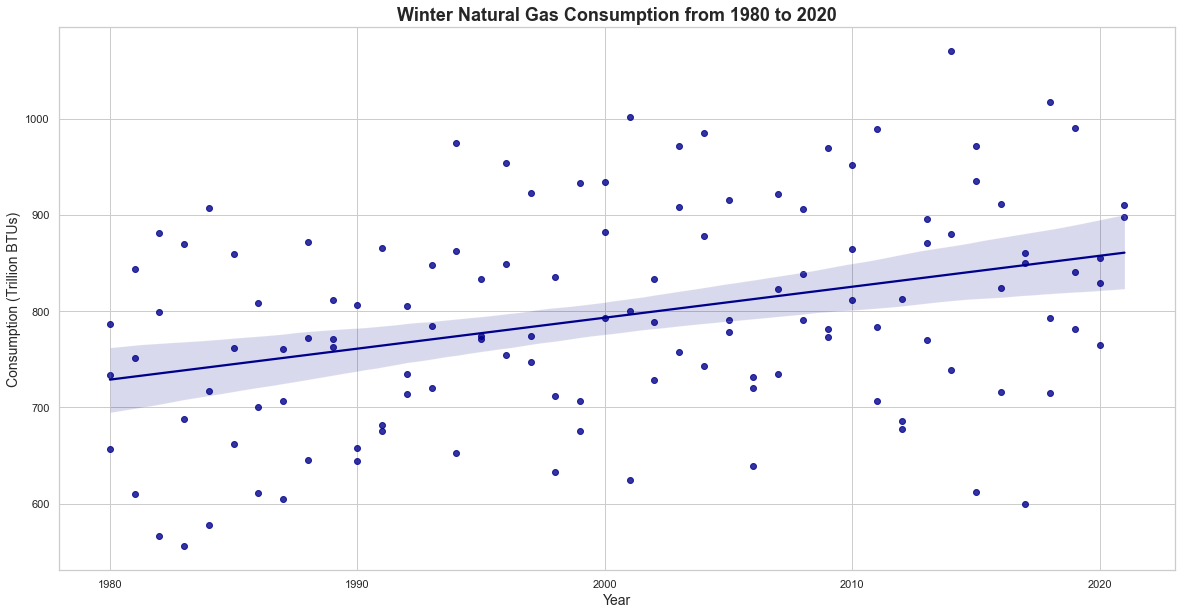

In [21]:
## Natural Gas: Winter Consumption
dfNatWinter = dfMonthly.loc[dfMonthly['MSN'] == 'NNRCBUS']
dfNatWinter = dfNatWinter.loc[dfNatWinter['YYYY'] >= 1980]
dfNatWinter = dfNatWinter.loc[(dfNatWinter['MM'] == 1) | (dfNatWinter['MM'] == 2) | (dfNatWinter['MM'] == 12)]

ax = sns.regplot(x = 'YYYY', y = 'Value', data = dfNatWinter, color = "darkblue")
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Winter Natural Gas Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Unsurprisingly, the natural gas consumption has increased since 1980, likely due to the change in temperatures that leads to more heating required, with more erratic temperatures occuring. The increase is ~16%, so not too significant, but it is more noticeable.

Text(0.5, 1.0, 'Winter Petroleum Consumption from 1980 to 2020')

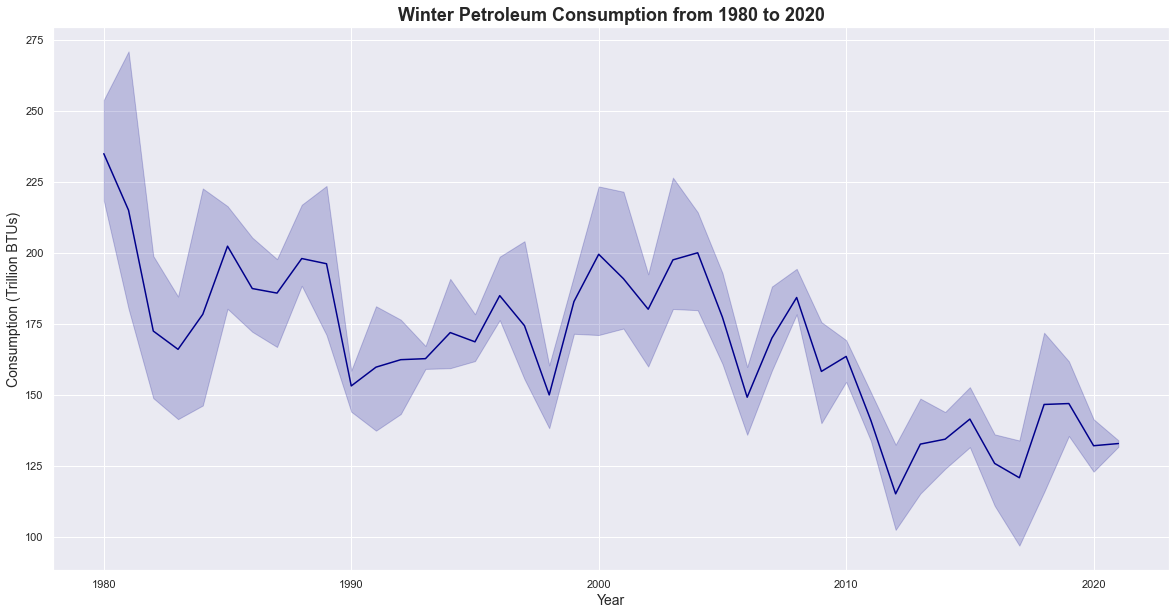

In [22]:
## Petroleum: Winter Consumption
dfPetWinter = dfMonthly.loc[dfMonthly['MSN'] == 'PARCBUS']
dfPetWinter = dfPetWinter.loc[dfPetWinter['YYYY'] >= 1980]
dfPetWinter = dfPetWinter.loc[(dfPetWinter['MM'] == 1) | (dfPetWinter['MM'] == 2) | (dfPetWinter['MM'] == 12)]


ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfPetWinter, color = "darkblue")
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Winter Petroleum Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Consistent with each of the previous 3 seasons, petroleum has also decreased in the winter months, albeit has not changed much since 2010. It can be assumed overall that this is due to petroleum being used less frequently in the United States, as natural gas is being used more in its place. Again, while natural gas may be less bad for the environment than petroleum, this is still not necessarily a good shift. 

Text(0.5, 1.0, 'Winter Fossil Fuel Consumption from 1980 to 2020')

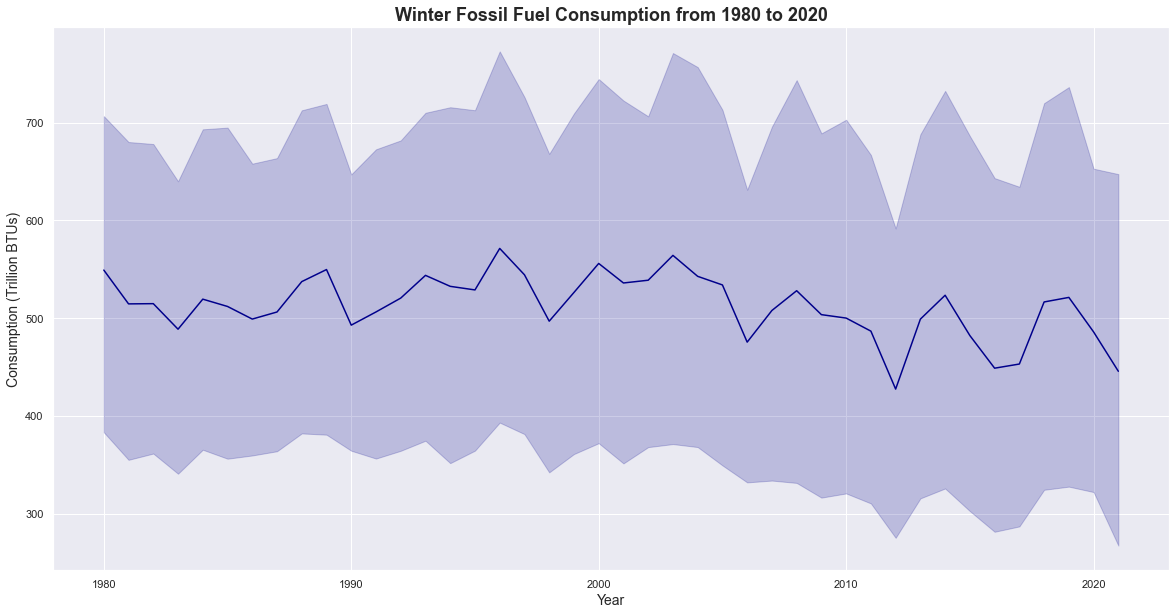

In [23]:
## Total Fossil Fuels: Winter Consumption

dfTotWinter = dfMonthly.loc[dfMonthly['MSN'] == 'FFRCBUS']
dfTotWinter = dfTotWinter.loc[dfTotWinter['YYYY'] >= 1980]
dfTotWinter = dfTotWinter.loc[(dfTotWinter['MM'] >= 1) | (dfTotWinter['MM'] >= 12) | (dfTotWinter['MM'] >= 12)]


ax = sns.lineplot(x = 'YYYY', y = 'Value', data = dfTotWinter, color = "darkblue")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("dark")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Consumption (Trillion BTUs)', fontsize = 14)
plt.title('Winter Fossil Fuel Consumption from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Similar to fossil fuel usage in the spring, summer, and the fall, the winter has also experienced a decrease in fossil fuel usage. Although the overall magnitude of decrease was not as large as the other months, there has been a decrease nontheless, especially in recent years. Looking back at the fall fossil fuel consumption, November's consumption was much higher than that of September and October. So, as it gets closer to winter, weather gets colder, and nights get longer, there is an overall increase in how much fossil fuel is consumed.

Overall, when looking at the seasonal data for natural gas and petroleum, petroleum has continued to quickly shrink in residential usage since 1980, while natural gas in the colder months of the year has tended to increase. In terms of total consumption, it is clear that fossil fuel consumption has trended downward in the summer and winter, while staying more stagnant during the spring and summer.

#### Seasonal Temperatures Over Time 

In [24]:
temp_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,-3.05,-4.03,2.12,6.85,13.76,18.30,22.30,20.64,15.39,10.61,2.63,-2.56
1,1902,-3.62,-2.56,1.84,7.62,14.39,18.24,20.60,19.91,15.07,10.04,3.23,-3.91
2,1903,-3.81,-4.28,2.51,7.18,13.11,17.25,20.34,19.77,15.10,9.45,1.54,-2.73
3,1904,-5.38,-3.81,1.89,7.21,13.49,17.82,20.30,19.34,15.97,9.70,3.23,-2.20
4,1905,-4.78,-4.30,4.60,8.01,13.24,18.27,20.34,20.30,16.24,8.52,3.50,-3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,-1.41,1.82,5.79,9.86,14.48,20.36,22.47,21.44,17.60,12.03,5.64,-1.93
116,2017,-1.96,1.87,3.90,10.01,14.24,19.73,22.65,20.48,17.25,10.95,4.43,-0.64
117,2018,-2.25,-0.38,3.45,7.48,16.43,20.13,22.48,21.11,17.66,10.48,2.51,-0.45
118,2019,-2.27,-1.72,3.05,9.52,14.13,19.24,22.42,21.40,18.50,9.47,3.03,0.04


In [27]:
col_list = ['Mar', 'Apr', 'May']
temp_dfSpring = temp_df
temp_dfSpring['Sum'] = temp_df[col_list].sum(axis=1) / 3
temp_dfSpring = temp_dfSpring.loc[temp_dfSpring['Year'] >= 1980]

This data wrangling creates a new df that takes the original temperature DF and leaves in the 3 months of the specific season we need. Then, the sums of the 3 months is taken and divided by 3, to get an average temperature point for that season. And, as with the previous section, we are looking at 1980 and later.

Text(0.5, 1.0, 'Spring Average Temperature from 1980 to 2020')

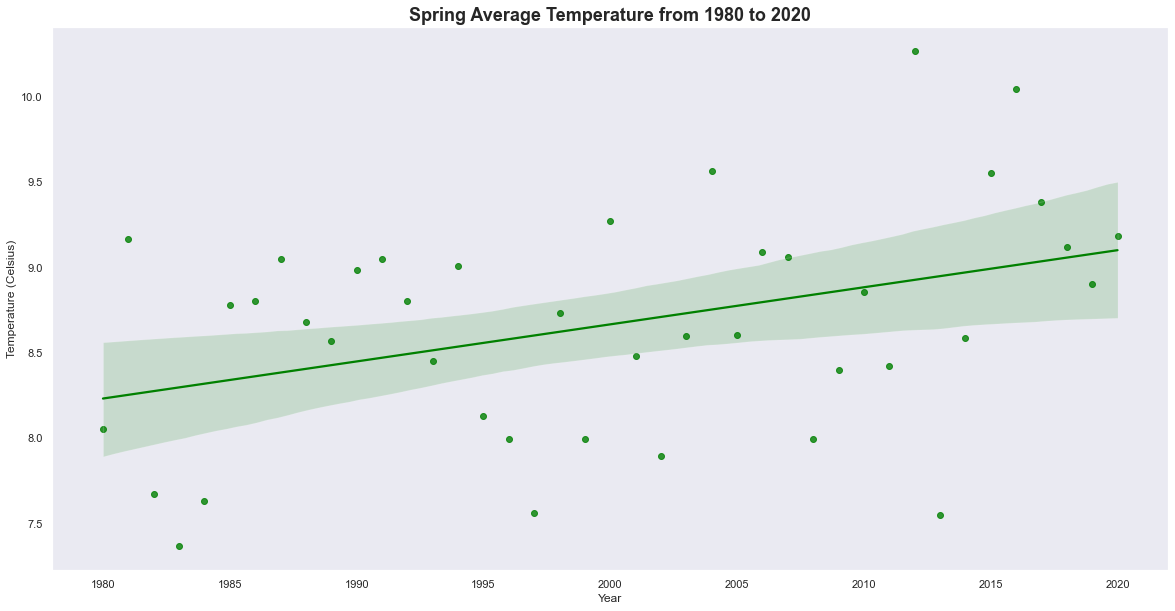

In [28]:
## Spring Temperature Over Time

ax = sns.regplot(x = 'Year', y = 'Sum', data = temp_dfSpring, color = "green")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("whitegrid")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Celsius)', fontsize = 12)
plt.title('Spring Average Temperature from 1980 to 2020', fontsize = 18, fontweight = 'bold')

The trend line that we provided seems to imply a steady increase in temperature in the spring. When we look at the plot however, we can see that there is a decent bit of fluctuation and outliers that do not necessarily fit the trend line. For the spring temperatures that are lower than the trend line, this may be attributed to the colder winter weather lasting further into the early spring months such as March and early April. For some of the outliers above the trend line, it may be attributed to the warmer summer weather coming early, making months such as May warmer than usual.

Text(0.5, 1.0, 'Summer Average Temperature from 1980 to 2020')

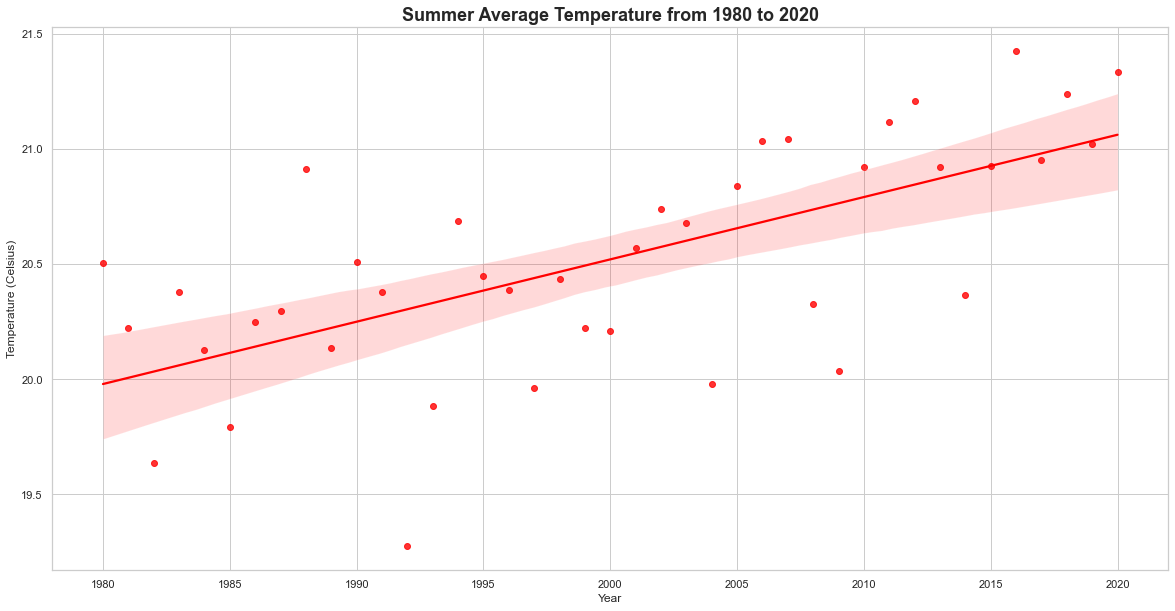

In [29]:
## Summer Temperature Over Time

col_list = ['Jun', 'Jul', 'Aug']
temp_dfSummer = temp_df
temp_dfSummer['Sum'] = temp_df[col_list].sum(axis=1) / 3
temp_dfSummer = temp_dfSummer.loc[temp_dfSummer['Year'] >= 1980]

ax = sns.regplot(x = 'Year', y = 'Sum', data = temp_dfSummer, color = "red")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme()
sns.set_style("whitegrid")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Celsius)', fontsize = 12)
plt.title('Summer Average Temperature from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Average summer temperatures have seen a significant increase. The trend line indicates that, on average, the summers have been getting hotter. We can ascribe this to global warming and that the planet has been getting hotter overall. The trend line also can help us predict that the summers will continue to get hotter, which is a problem that has been on the forefront of science and politics for a while now.

Text(0.5, 1.0, 'Fall Average Temperature from 1980 to 2020')

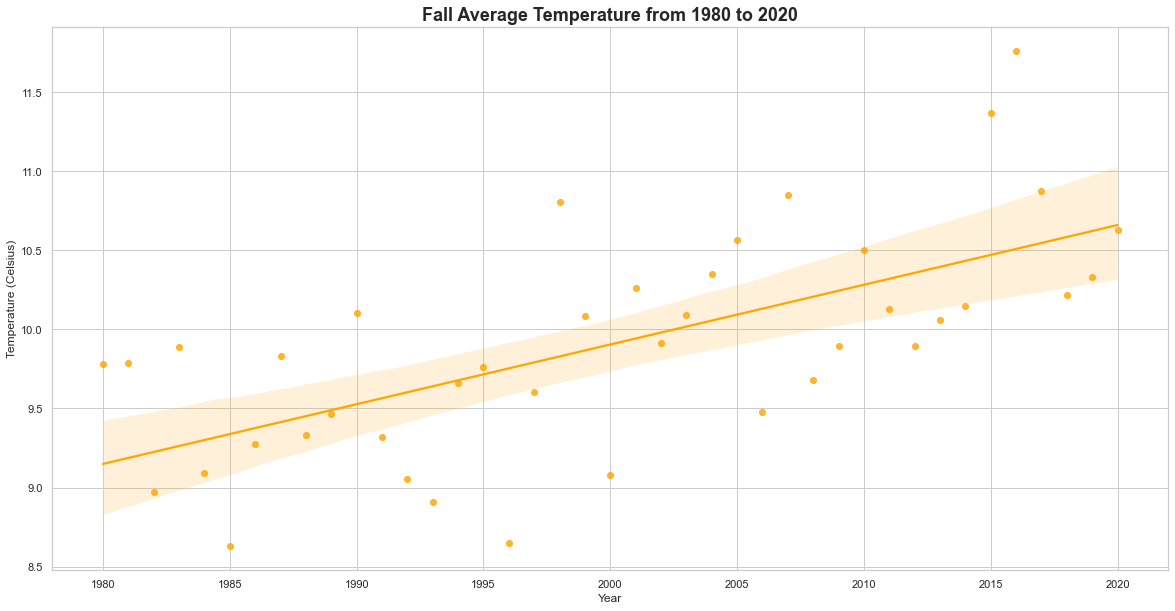

In [30]:
## Fall Temperature Over Time

col_list = ['Sep', 'Oct', 'Nov']
temp_dfFall = temp_df
temp_dfFall['Sum'] = temp_df[col_list].sum(axis=1) / 3
temp_dfFall = temp_dfFall.loc[temp_dfFall['Year'] >= 1980]

ax = sns.regplot(x = 'Year', y = 'Sum', data = temp_dfFall, color = "orange")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("dark")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Celsius)', fontsize = 12)
plt.title('Fall Average Temperature from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Compared to the other seasons, the fall average temperature has seen a similar upward trend of average temperature. It seems that the fall average temperature over the past 40 years has seen fluctuation similar to the other months, but just not to the same amount of variability that the spring, summer, and winter have. The coldest fall in the past 40 years came in 1985 when the average temperature was ~8.6 degrees Celsius. The highest average temperature for the fall came in 2016, which was ~11.7 degrees Celsius. 

Text(0.5, 1.0, 'Winter Average Temperature from 1980 to 2020')

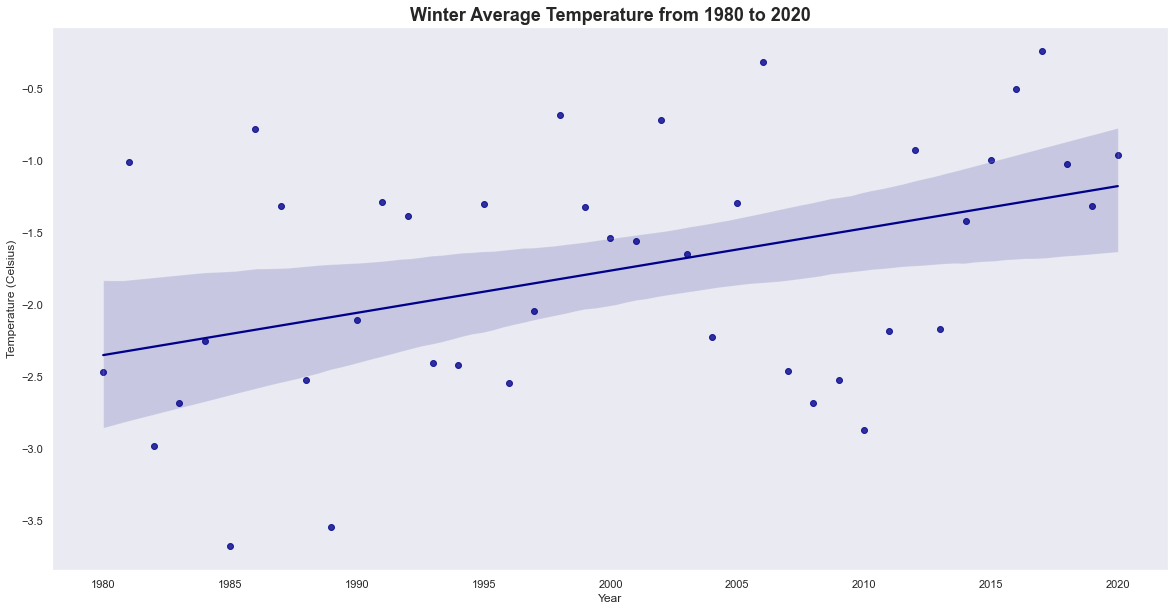

In [31]:
## Winter Temperature Over Time

col_list = ['Jan', 'Feb', 'Dec']
temp_dfWinter = temp_df
temp_dfWinter['Sum'] = temp_df[col_list].sum(axis=1) / 3
temp_dfWinter = temp_dfWinter.loc[temp_dfWinter['Year'] >= 1980]

ax = sns.regplot(x = 'Year', y = 'Sum', data = temp_dfWinter, color = "darkblue")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme()
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Celsius)', fontsize = 12)
plt.title('Winter Average Temperature from 1980 to 2020', fontsize = 18, fontweight = 'bold')

Similar to that of the other seasons, winter average temperature has also been increasing since 1980. Although some areas of the United States have seen colder winters due to global warming, this data refers to the entire United States, showing that American winters have overall been getting warmer. Climate change has caused a fluctuation in weather patterns that are normal for the seasons. The overall change in climate can not only have a difference in patterns but also in magnitude as well which is why some years are colder than others. This is shown in the graph as 1985 had the lowest average temperature in our dataset, which was ~-3.7 degrees Celsius. 1985 also had the coldest average fall temperature. The peak temperature in the graph was ~-0.3 in 2017. One of the most interesting parts of this graph is the drop from a warm winter in 2006 and then the colder ones that proceeded in 2007 to about 2013. 

Text(0.5, 1.0, 'Yearly Average Temperature from 1980 to 2020')

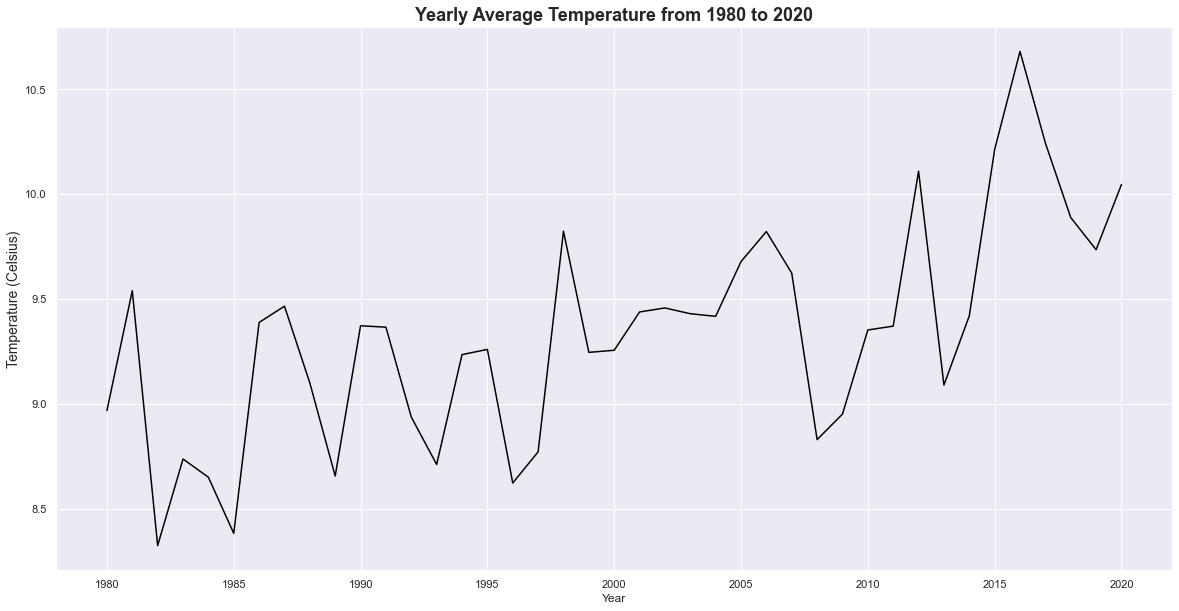

In [32]:
## Yearly Temperature Over Time

col_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp_dfTot = temp_df
temp_dfTot['Sum'] = temp_df[col_list].sum(axis=1) / 12
temp_dfTot = temp_dfTot.loc[temp_dfTot['Year'] >= 1980]

ax = sns.lineplot(x = 'Year', y = 'Sum', data = temp_dfTot, color = "black", ci = "sd")
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Celsius)', fontsize = 14)
plt.title('Yearly Average Temperature from 1980 to 2020', fontsize = 18, fontweight = 'bold')

From the beginning of the graph to the end, there has been ~1 degree Celsius increase in yearly average temperature. This increase has not been a straight line however. There has been fluctuation between the past 40 years. The graph indicates that every year or two sees a spike or a dip in yearly average temperature. One of the points that was touched upon earlier was that climate change creates a change in weather patterns, which is very clear in this data as well. The United States saw the largest increase in yearly average temprature from 2013 to 2016. After that, the temperature dipped once again and has been on the rise since 2019. There will most likely be more of an increase for another year and then it will dip again if we make that prediction based off of the trend that is evident to us in this graph.

#### Correlation

In this section, we will show charts for varying timeframes between 1980-2020, finding correlations using Pearson's Correlation, and determining whether there is a positive, 0 or negative correlation between fossil fuel consumption in the residential sector compared to average temperature.

Text(0.5, 1.0, 'Temperature vs Total Fossil Fuel Consumption')

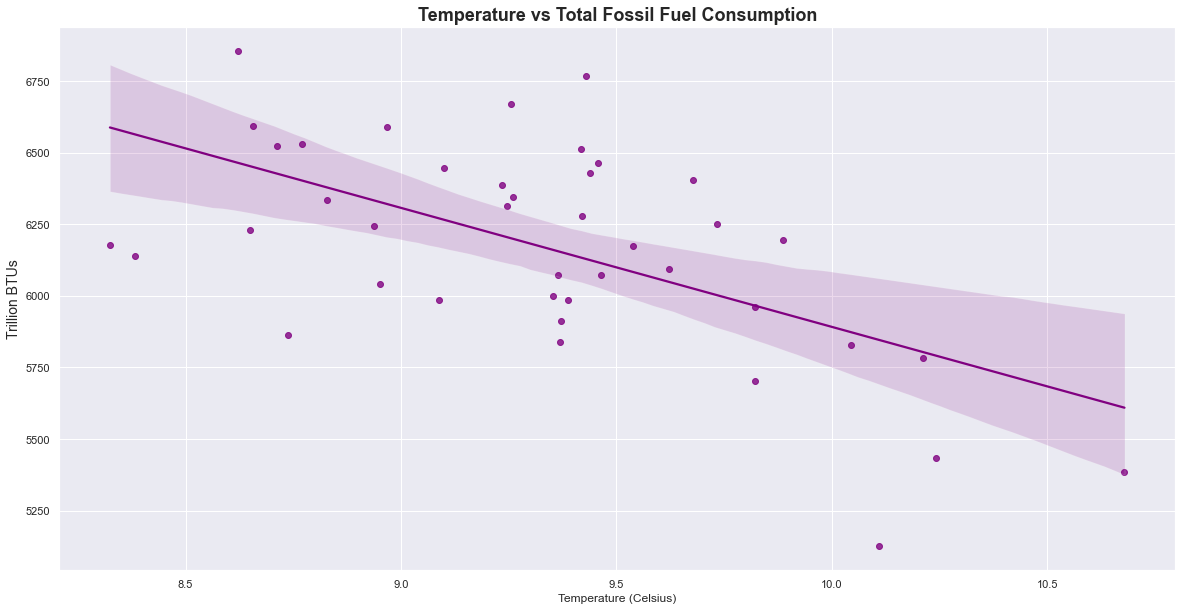

In [33]:
##
dfFossilFuel2 = dfFossilFuel.loc[dfFossilFuel['YYYY'] >= 1980]

ax = sns.regplot(x = temp_dfTot['Sum'], y = dfFossilFuel2['Value'], color = "purple")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style = "ticks")
plt.xlabel('Temperature (Celsius)', fontsize = 12)
plt.ylabel('Trillion BTUs', fontsize = 14)
plt.title('Temperature vs Total Fossil Fuel Consumption', fontsize = 18, fontweight = 'bold')

In [34]:
corr, _ = pearsonr(temp_dfTot['Sum'], dfFossilFuel2['Value'])
corr

-0.5927034394214107

Using Pearson's Correlation, this shows that there is a -0.59 linear correlation, implying rather a definite negative correlation, showing that total consumption has actually been less in years where the temperature was higher. This is different than what we were expected, as although residential fossil fuel consumption is far from a sole metric to measure emissions and climate change, we assumed that there would be a stronger correlation.

However, since greenhouse gases stay in the year for decades to hundreds of years, we wondered if there was any possible effects that occur when looking changing the timeframe; in this case, we changed the fossil fuel consumption data to look strictly at 1980-2010, and then compare that to the temperature average between 1990-2020, and see if there is any stronger correlation between the two once the greenhouse emissions have been in the air for some time.

Text(0.5, 1.0, 'Temperature vs Total Fossil Fuel Consumption: 10 Year Delay')

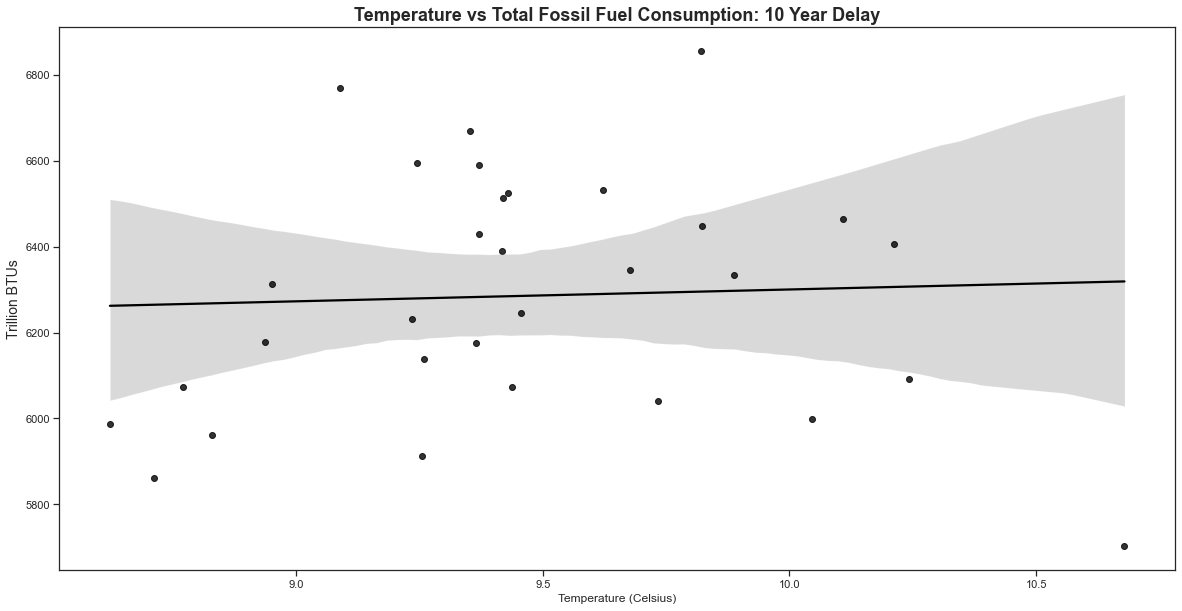

In [35]:
dfFossilFuel3 = dfFossilFuel.loc[(dfFossilFuel['YYYY'] >= 1980) & (dfFossilFuel['YYYY'] <= 2010)]
temp_dfTot2 = temp_dfTot.loc[temp_dfTot['Year'] >= 1990]

ax = sns.regplot(x = temp_dfTot2['Sum'], y = dfFossilFuel3['Value'], color = "black")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style = "whitegrid")
plt.xlabel('Temperature (Celsius)', fontsize = 12)
plt.ylabel('Trillion BTUs', fontsize = 14)
plt.title('Temperature vs Total Fossil Fuel Consumption: 10 Year Delay', fontsize = 18, fontweight = 'bold')

The correlation is stronger when changing the timeframes to a 30-year one, followed by 10-year delay for temperature data. However, looking at the correlation value of 0.047, its still near 0, meaning that there is practically no correlation between these two variables.

In [36]:
corr, _ = pearsonr(temp_dfTot2['Sum'], dfFossilFuel3['Value'])
corr

0.04783751740364685

Text(0.5, 1.0, 'Temperature vs Total Fossil Fuel Consumption: 20 Year Delay')

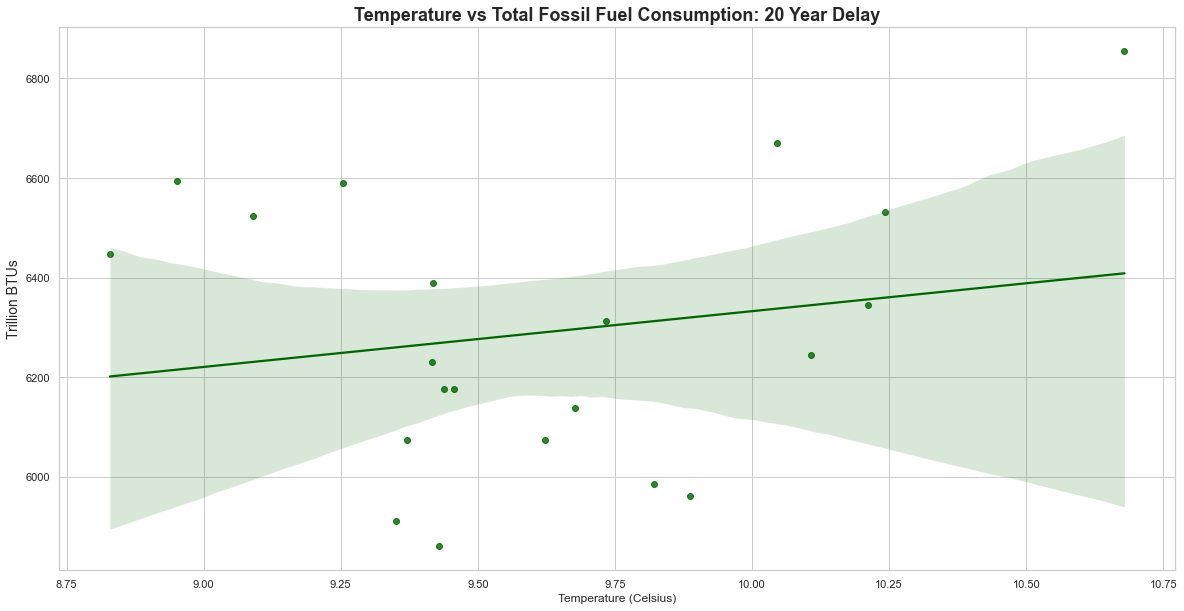

In [37]:
dfFossilFuel4 = dfFossilFuel.loc[(dfFossilFuel['YYYY'] >= 1980) & (dfFossilFuel['YYYY'] <= 2000)]
temp_dfTot3 = temp_dfTot.loc[temp_dfTot['Year'] >= 2000]


ax = sns.regplot(x = temp_dfTot3['Sum'], y = dfFossilFuel4['Value'], color = "darkgreen")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("dark")
plt.xlabel('Temperature (Celsius)', fontsize = 12)
plt.ylabel('Trillion BTUs', fontsize = 14)
plt.title('Temperature vs Total Fossil Fuel Consumption: 20 Year Delay', fontsize = 18, fontweight = 'bold')

Finally, we implemented a 20 year delay, with 1980-2000 fossil fuel data, followed by the temperature data for 2000-2020. Unsurprising to us, the correlation did get stronger: now a 0.189. This is still a slight correlation, but it is interesting to see the correlation change when checking temperature data years after the fossil fuel consumption occurred. 

In [38]:
corr, _ = pearsonr(temp_dfTot3['Sum'], dfFossilFuel4['Value'])
corr

0.18944093655459437

### Conclusion

With the data, visualization, and comparisons that we have made, there is a link between energy usage and temperature. With that being said, it is important to make the distinction that there are other factors that play into energy consumption and the change in temperature. The use of fossil fuels and gasses heavily plays into global warming and climate change, which can help explain why we have seen warmer average temperatures over the years. As for energy consumption, energy efficiency and the rise of electricity over natural gases can help explain why there is a decrease in natural gas and fossil fuel consumption. The economic and political landscape of the United States can also have an effect on how American consume energy. An example of this is was the increase in oil prices after Hurricane Katrina ravaged the Southeast United States in 2005. As the economy and politics of the country change as well as the constant change in climate due to climate change, it will be interesting to see whether or not the current trends that we see will stay on the same path or change drastically due to some different events in the future that we cannot predict.

#### References

EIA - Energy Information Administration Dataset link:
https://www.eia.gov/totalenergy/data/browser/?tbl=T02.02#/?f=M&start=202003&end=202111&charted=2-3-4-10-12

Climate Change Knowledge Portal - Temperature link:
https://climateknowledgeportal.worldbank.org/download-data

Natural gas information:
https://group.met.com/en/mind-the-fyouture/mindthefyouture/natural-gas-environmental-impact